In [12]:
from operator import index
import pandas as pd
import os
import math
import seaborn as sns
import matplotlib.pyplot as plt

In this project there are four main goals:
1. to count how many lines are in a drawing
2. to calculate the length of each line and the mean pressure when computing each line
3. to check how many hand lifts were in each drawing
4. to check if the shape is open or closed (bonus)

### Attempts to goal no' 1 - count how many lines are in a drawing:

#### 2. calculating the length of each line and the mean pressure when computing each line:

In [13]:
def find_lines_length_and_pressure_by_index(df, indexes):
    #df is the dataframe, indexes is a list of the start/ end points of each line in the drawing (end of one is the start of another)
    if (len(indexes)==0):
        print("Average pressure: ", df[' Pressure'].mean())
        print("Total length: ", df['dist'].sum())
        
    for i in range(len(indexes)):
        if (i==0):
            print("Average pressure of line 1: ", df[df.index < indexes[0]][' Pressure'].mean())
            print("Length of line 1: ", df[df.index < indexes[0]]['dist'].sum())
        elif (i==len(indexes)-1):
            print("Average pressure of line ", len(indexes),": ", df[df.index > indexes[len(indexes)-1]][' Pressure'].mean())
            print("Length of line ", len(indexes),": ", df[df.index > indexes[len(indexes)-1]]['dist'].sum())
        else:
            print("Average pressure of line ", (i+1), ": ", df[(df.index > indexes[i-1]) and (df.index < indexes[i])][' Pressure'].mean())
            print("Length of line ", (i+1), ": ", df[(df.index > indexes[i-1]) and (df.index < indexes[i])]['dist'].sum())

#### 3. checking how many hand lifts were in each drawing

In [20]:
def find_hand_off_by_pressure(df):
    ave_pressure = df[' Pressure'].mean()
    min_pressure = df[' Pressure'].min()
    max_pressure = df[' Pressure'].max()
    smallest_values = df[df[' Pressure'] < (min_pressure + max_pressure)/2].sort_index()
    smallest_values['idx'] = smallest_values.index
    smallest_values['idx_shift'] = smallest_values.shift()['idx']
    smallest_values.drop(smallest_values.head(1).index,inplace=True)
    num_of_hand_lifts = (smallest_values['idx']-smallest_values['idx_shift']).apply(lambda x: 0 if x==1.0 else 1).sum() + 1
    print("The number of hand lifts computed by pressure is: ", num_of_hand_lifts)

#### 4. checking if the shape is open or closed

In [21]:
def is_shape_open(df, indexes):
    #df is the dataframe, indexes is the list of start/end points of each line
    #does the average delta x needs to be to each line or to the whole shape? 
    boolian = False
    for point in df.rows:
        for point2 in df.rows:
            if (point==point2):
                continue
            elif ((pow((df[point]['X']-df[point2]['X']),2) + pow((df[point][' Y']-df[point2][' Y']),2)).apply(lambda x: math.sqrt(x)) < averageradius):
                boolian = True
                break
    return boolian

testing functions:

C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/7554/SimpleTest/9.csv
The number of hand lifts computed by pressure is:  6


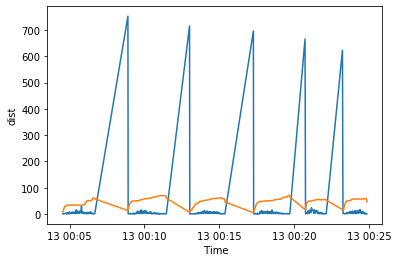

C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/7556/SimpleTest/9.csv
The number of hand lifts computed by pressure is:  6


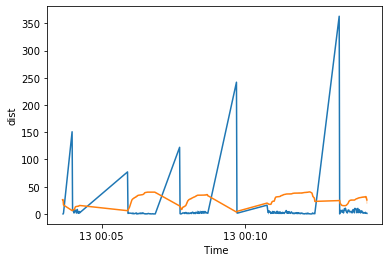

C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/7557/SimpleTest/9.csv
The number of hand lifts computed by pressure is:  4


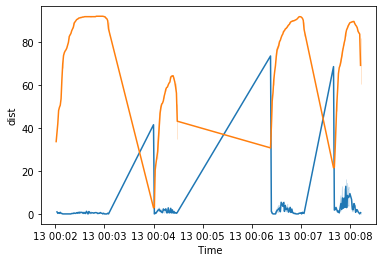

C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/7558/SimpleTest/9.csv
The number of hand lifts computed by pressure is:  10


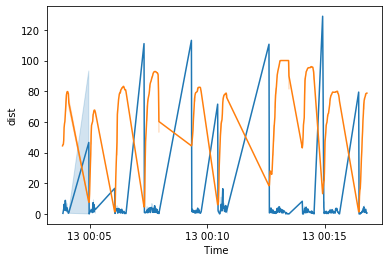

C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/7559/SimpleTest/9.csv
The number of hand lifts computed by pressure is:  6


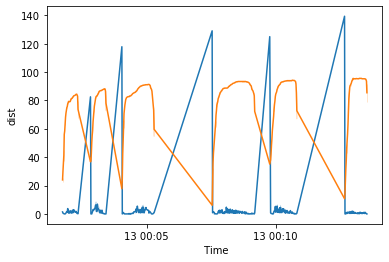

C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/7560/SimpleTest/9.csv
The number of hand lifts computed by pressure is:  5


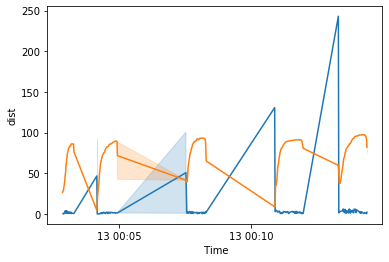

C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/7561/SimpleTest/9.csv
The number of hand lifts computed by pressure is:  4


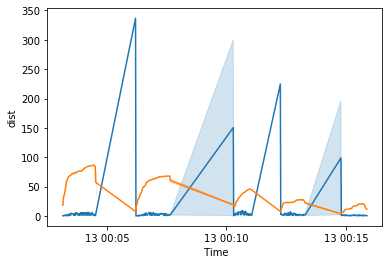

C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/7563/SimpleTest/9.csv
The number of hand lifts computed by pressure is:  5


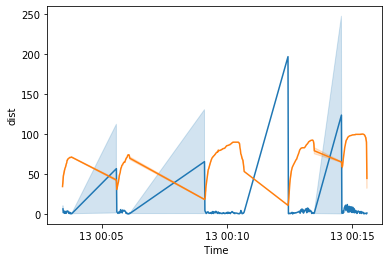

C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/7569/SimpleTest/9.csv
The number of hand lifts computed by pressure is:  5


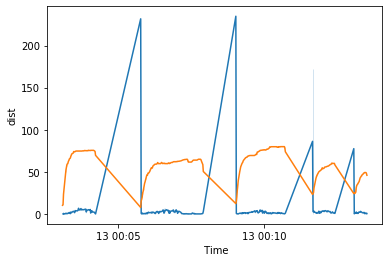

C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/7570/SimpleTest/9.csv
The number of hand lifts computed by pressure is:  5


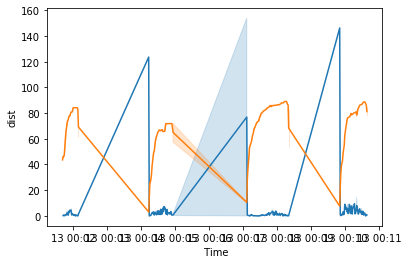

C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/7571/SimpleTest/9.csv
The number of hand lifts computed by pressure is:  4


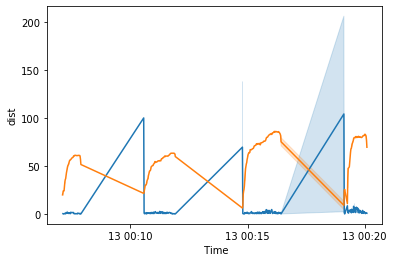

C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/7572/SimpleTest/9.csv
The number of hand lifts computed by pressure is:  5


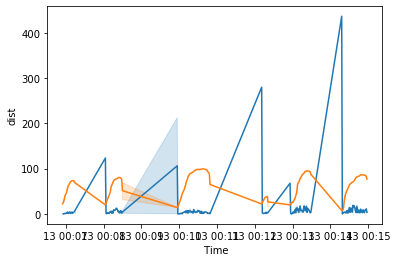

C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/7573/SimpleTest/9.csv
The number of hand lifts computed by pressure is:  6


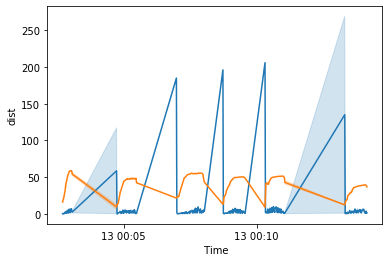

C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/7574/SimpleTest/9.csv
The number of hand lifts computed by pressure is:  7


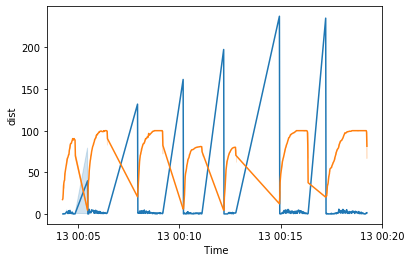

In [22]:
for dir in os.listdir("C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data"):
    if os.path.isdir("C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/"+dir):
        full_dir = "C:/אריאל/שנה א/סמסטר ב/הדמיית נתונים/Data_visualization_project/Working with pandas - kids drawings project/data/" + dir + "/SimpleTest/"
        for file in os.listdir(full_dir):
            if file.endswith('.csv'):
                if (file == "9.csv"):
                    print(full_dir+file)
                    df = pd.read_csv(full_dir+file)
                    df.drop(df.tail(2).index, inplace=True) #last two lines appers only on the 'X' column and contains summary of drawing time
                    if (df.shape[0] < 2): #less than 2 rows means that the file is empty
                        continue
                    df['X'] = df['X'].astype('float64')
                    df[' Time'] = pd.to_datetime(df[' Time'])
                    df[' Pressure'] = df[' Pressure'] * 100 #in order to see things more clearly in the graphs
                    df['dist'] = (df['X'].diff()**2 + df[' Y'].diff()**2).apply(lambda x: math.sqrt(x)) #the distance between point to the previous one
                    #df.drop(df.head(1).index, inplace=True) #the first measurment dosen't have distance because it dosen't have a previous point
                    
                    find_hand_off_by_pressure(df)
                    
                    
                    sns.lineplot(data=df,y='dist', x=' Time')
                    sns.lineplot(data=df,y=' Pressure', x=' Time')
                    plt.show() #distance-Time graph with added line for pressure